# Pronósticos y Predicciones 

## Descripción del Proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.
Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Descripción del Dataset

El dataset incluye los siguientes campos:

### Variable objetivo
- **Churn** — Indica si el cliente canceló la membresía en el mes en cuestión.

### Datos del usuario del mes anterior
- **gender** — Género del cliente.
- **Near_Location** — Indica si el cliente vive o trabaja en el vecindario donde se encuentra el gimnasio.
- **Partner** — Indica si el cliente trabaja en una compañía asociada que ofrece descuentos en el gimnasio.
- **Promo_friends** — Indica si el cliente se inscribió mediante una oferta “trae a un/a amigo/a” usando un código promocional.
- **Phone** — Indica si el cliente proporcionó su número de teléfono.
- **Age** — Edad del cliente.
- **Lifetime** — Tiempo (en meses) desde la primera visita del cliente al gimnasio.

### Datos del registro de visitas, compras y estado actual de la membresía
- **Contract_period** — Duración del contrato: 1 mes, 3 meses, 6 meses o 1 año.
- **Month_to_end_contract** — Meses que faltan para que expire el contrato.
- **Group_visits** — Indica si el cliente participa en sesiones grupales.
- **Avg_class_frequency_total** — Frecuencia media de visitas por semana a lo largo de toda la vida del cliente.
- **Avg_class_frequency_current_month** — Frecuencia media de visitas por semana durante el mes en curso.
- **Avg_additional_charges_total** — Total gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.


## 1. Descargar los datos

In [80]:
# Se cargan todas las librerías que se puedan usar:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [81]:
# Importar el Dataset
df= pd.read_csv('/datasets/gym_churn_us.csv')

## 2. Análisis Exploratorio de datos (EDA)

### 2. 1 Estudiar los valores promedio 

In [82]:
df.describe()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


El análisis muestra que la mayoría de los clientes son jóvenes, viven o trabajan cerca del gimnasio y tienen contratos relativamente cortos. La frecuencia de asistencia y el gasto en servicios adicionales varían ampliamente entre los clientes. Aproximadamente un cuarto de los clientes cancela su membresía cada mes, lo que indica la necesidad de estrategias de retención enfocadas en fidelización y seguimiento de clientes en riesgo.

In [83]:
df.shape


(4000, 14)

In [84]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El dataset contiene 4000 registros de clientes con 14 variables que incluyen información demográfica, comportamiento de asistencia, gasto en servicios y estado de la membresía. La mayoría de las columnas son numéricas enteras, con algunas variables continuas en tipo float64 (como gastos adicionales y frecuencia de asistencia). No hay valores faltantes, lo que facilita el análisis. Esto permite realizar estudios de segmentación, análisis de cancelación y patrones de comportamiento sin necesidad de limpieza de datos previa.

In [86]:
# Evaluar la exactitud
print('La exactitud del modelo de regresión es: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('La presición del modelo de regresión es: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('La sensibilidad del modelo de regresión es: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

La exactitud del modelo de regresión es: 0.93
La presición del modelo de regresión es: 0.88
La sensibilidad del modelo de regresión es: 0.83


In [87]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Las variables se encuentran en formato mixto de maýusculas y minúsculas, para mejores prácticas de uso de las variables, las pondré todas en minúscula. 

In [88]:
# Se cambian a minúsculas los nombres de todas las columnas:
df.columns = df.columns.str.lower()

# Se verifica que se hayan cambiado a minúsculas debidamente los nombres de las columnas:
print('Nombres de columnas actualizados:\n')
df.info()

Nombres de columnas actualizados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_t

Nos damos cuenta que no existen valores asusentes.

In [89]:
# Se cuenta la cantidad de filas totalmente duplicadas.
print('La cantidad de filas totalmente duplicadas es:', df.duplicated().sum(),'.')

La cantidad de filas totalmente duplicadas es: 0 .


In [90]:
# Se muestran las filas totalmente duplicadas:
print('Filas totalmente duplicadas:\n')
df[df.duplicated()]

Filas totalmente duplicadas:



,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


No existen valores duplicados en el Dataset.

### 2. 2 Observar los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [91]:
df.groupby('churn').mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Los clientes que se quedan son más maduros, viven cerca, tienen pareja y amigos en el gimnasio, firman contratos largos, asisten más a clases (especialmente en el mes actual) y consumen más servicios adicionales.
En cambio, los que se van tienden a ser más jóvenes, con contratos cortos, menos frecuencia de clases y menor antigüedad.

### 2.3 Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron

In [92]:
def hist_graph(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]

    # Colores personalizados para churn
    colors = {0: "green", 1: "red"}

    for i in key_cols:
        plt.figure(figsize=(6,4))
        for cl in x[group_col].unique():
            sns.histplot(
                x=x_new[x_new[group_col] == cl][i],
                label=f'{group_col} = {cl}',
                bins=10,
                color=colors.get(cl, "gray"),  # usa verde o rojo, si no encuentra -> gris
                alpha=0.6
            )
        plt.title(f"Distribución de {i} por {group_col}")
        plt.xlabel(i)
        plt.ylabel("Frecuencia")
        plt.legend(title=group_col)
        plt.show()

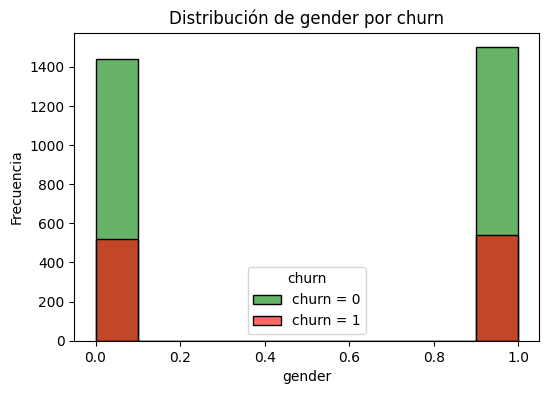

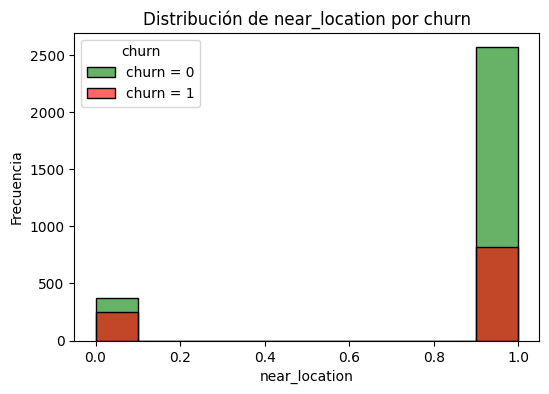

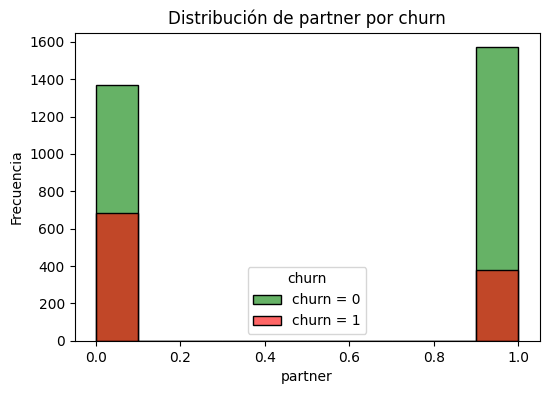

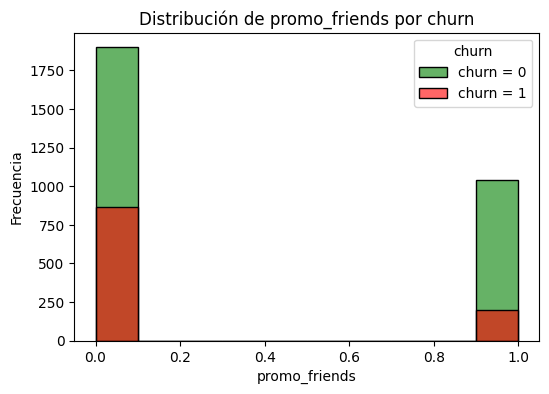

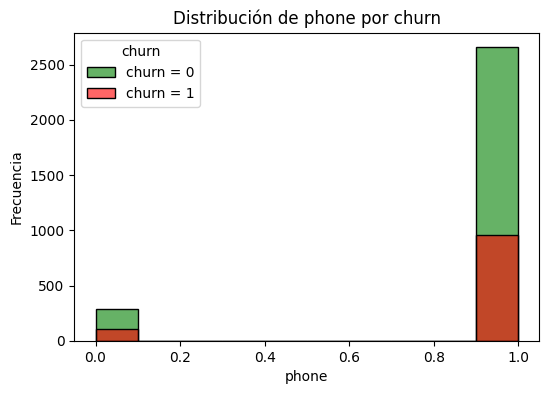

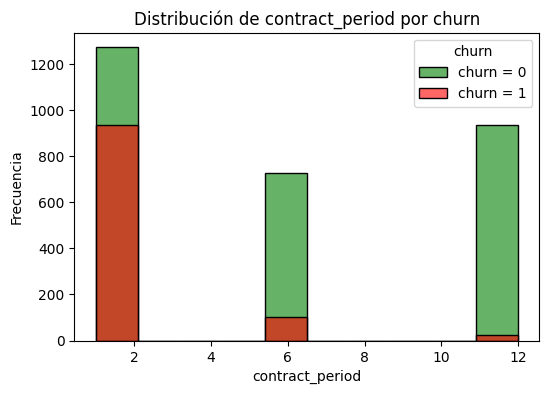

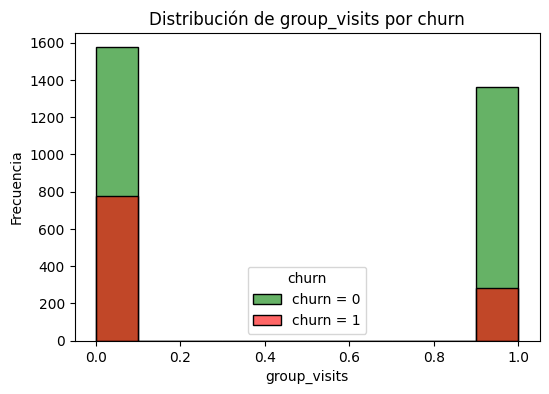

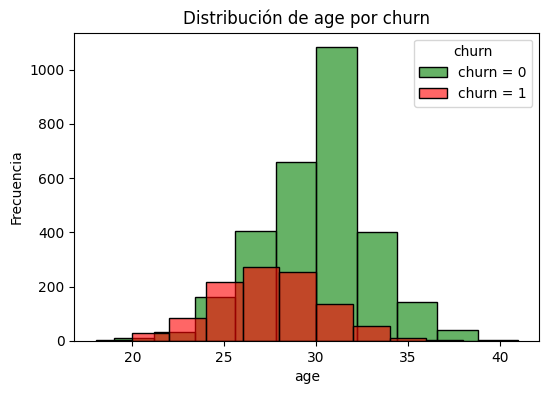

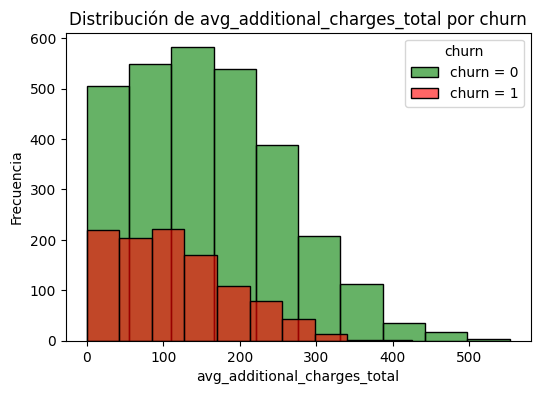

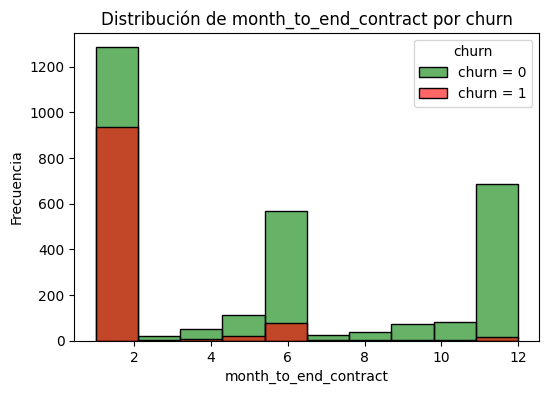

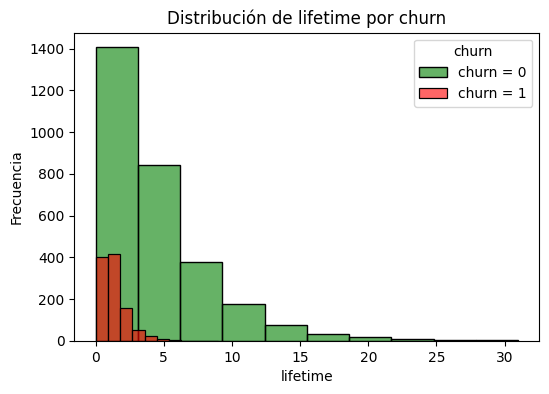

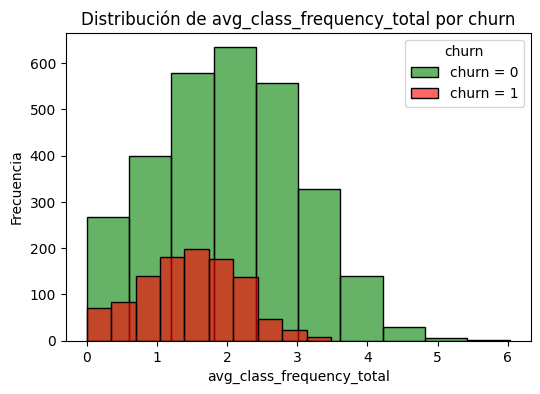

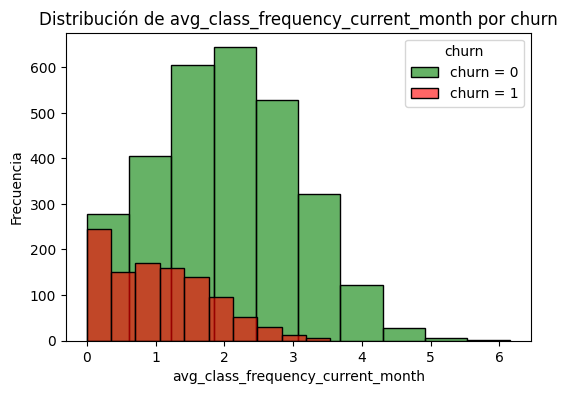

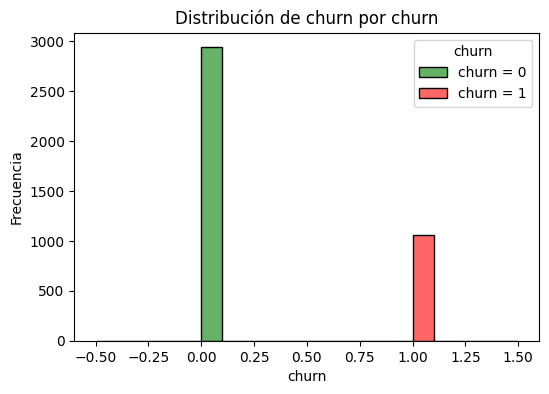

In [93]:
hist_graph(df,'churn',df.columns)

Los clientes que cancelan suelen ser más jóvenes, llevan menos de 6 meses en el gimnasio y asisten menos de 3 veces por semana, mientras que mayores gastos y edad superior a 33 años se asocian con menor cancelación. Sin embargo, los rangos de estas características se solapan entre quienes cancelan y quienes no, por lo que los gráficos no permiten predecir con precisión; se recomiendan modelos de predicción para identificar patrones complejos.

### 2.3 Crea una matriz de correlación

In [94]:
matriz = df.corr()
matriz

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


* La variable Churn (cancelación) muestra correlaciones negativas más fuertes con:

* Age (-0.405): clientes mayores tienen menor probabilidad de cancelar.

* Lifetime (-0.438): clientes con más tiempo en el gimnasio son más leales.

* Contract_period (-0.390): contratos más largos se asocian con menor cancelación.

* Avg_class_frequency_current_month (-0.412): clientes que asisten más frecuentemente cancelan menos.

* Month_to_end_contract (-0.381):  a medida que falta más tiempo para terminar el contrato, menor es la cancelación.



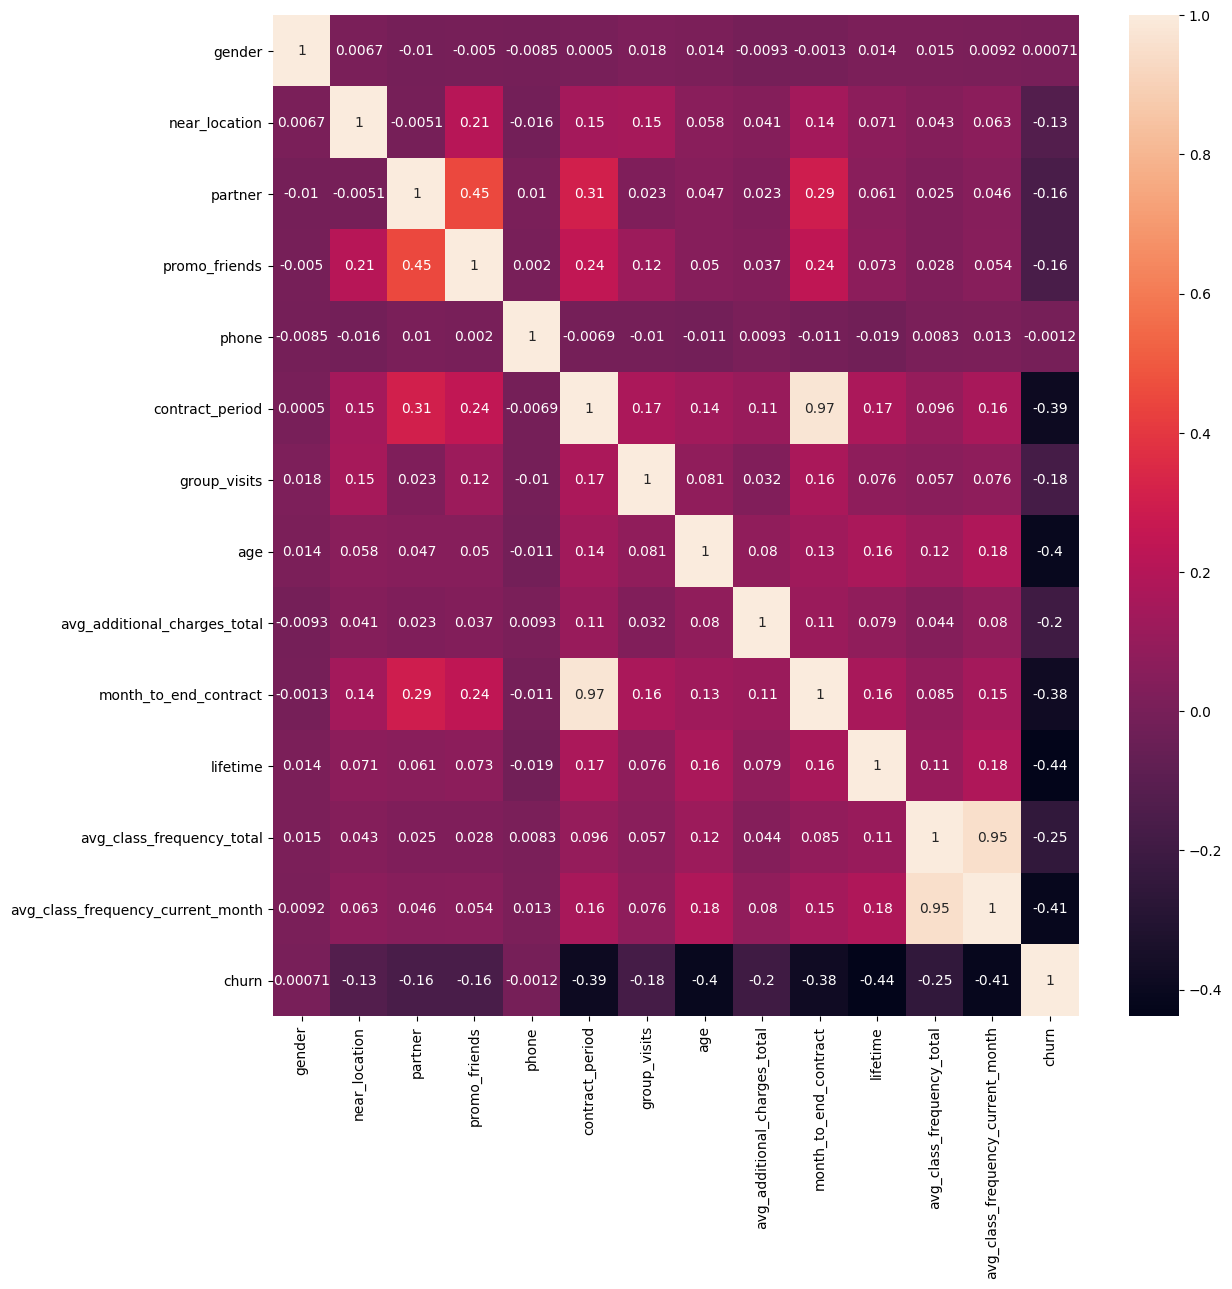

In [95]:
plt.figure(figsize=(13,13))
sns.heatmap(matriz, annot=True)
plt.show()

Las características binarias (Partner, Promo_friends, Group_visits) muestran correlaciones negativas leves con la cancelación, indicando que tener incentivos o participar en actividades grupales reduce ligeramente el riesgo de churn.

Otras variables como gender, phone o Near_Location tienen correlaciones muy cercanas a cero, sugiriendo que no influyen significativamente en la cancelación.

Los clientes más leales suelen ser mayores, con contratos largos, mayor antigüedad y frecuencia de asistencia. Las decisiones de retención deberían centrarse en fomentar la permanencia, la asistencia regular y la participación en servicios adicionales o actividades grupales.

## 3.Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.



### 3.1 Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [96]:
features = df.drop('churn',axis = 1)
target = df['churn']
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.2)

print('Datos entrenamiento:' , X_train.shape)
print('Datos valdiación:', X_val.shape)
print('Objetivo entrenamiento:', y_train.shape)
print('Objetivo validación:', y_val.shape)

Datos entrenamiento: (3200, 13)
Datos valdiación: (800, 13)
Objetivo entrenamiento: (3200,)
Objetivo validación: (800,)


El dataset se dividió en conjuntos de entrenamiento y validación utilizando un 80% de los datos para entrenamiento (3200 registros) y un 20% para validación (800 registros). Tanto las características como la variable objetivo quedaron correctamente separadas, lo que permite entrenar modelos de predicción de churn y evaluar su desempeño de manera confiable sobre datos no vistos.

### 3.2 Entrena el modelo en el set de entrenamiento con dos métodos

**Regresión Logística**

In [97]:
# Escalado + modelo en un pipeline
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

lr_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [98]:
# Realizar las predicciones 
y_prob_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)

In [99]:
# Evaluar la exactitud
print('La exactitud del modelo de regresión es: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('La presición del modelo de regresión es: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('La sensibilidad del modelo de regresión es: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

La exactitud del modelo de regresión es: 0.93
La presición del modelo de regresión es: 0.89
La sensibilidad del modelo de regresión es: 0.84


**Bosque Aleatorio**

In [100]:
# Bosque aleatorio
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_val)

# Evaluar
print('La exactitud del modelo de bosque aleatorio es: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('La precisión del modelo de bosque aleatorio es: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('La sensibilidad del modelo de bosque aleatorio es: {:.2f}'.format(recall_score(y_val, y_pred_rf)))

La exactitud del modelo de bosque aleatorio es: 0.92
La precisión del modelo de bosque aleatorio es: 0.87
La sensibilidad del modelo de bosque aleatorio es: 0.84


* Ambos modelos tienen la misma exactitud (0.92).

* El Bosque Aleatorio logra mayor precisión (0.87 vs 0.86) → mejor para evitar falsos positivos.

* La Regresión Logística logra mayor recall (0.84 vs 0.82) → mejor para identificar más casos de churn (evitar falsos negativos).

Si la prioridad es detectar la mayor cantidad posible de clientes que se van a dar de baja (recall), entonces la Regresión Logística es mejor.
Si la prioridad es predecir con más certeza los que realmente se van (precisión), el Bosque Aleatorio es mejor.

## 4. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios).

### 4.1 Estandariza los datos

In [101]:
# 1. Seleccionar las características (quitamos 'churn')
features = df.drop('churn', axis=1)

# 2. Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



### 4.2 Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

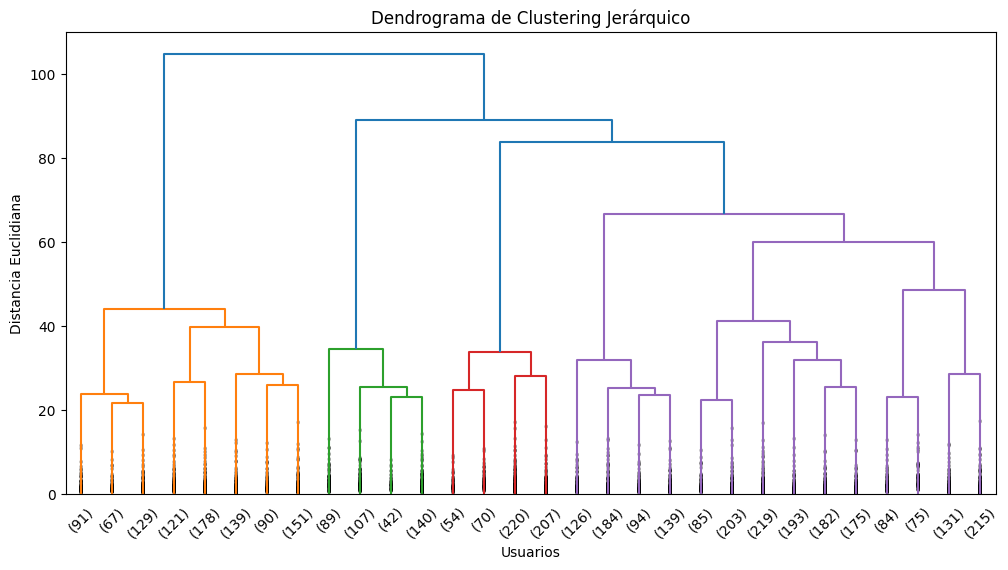

In [102]:
# 3. Crear la matriz de distancias con linkage
linked = linkage(features_scaled, method='ward')

# 4. Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Usuarios")
plt.ylabel("Distancia Euclidiana")
plt.show()

### 4.3 Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes

(Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [103]:
# 1. Definir el modelo con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)

# 2. Entrenar el modelo sobre los datos estandarizados
kmeans.fit(features_scaled)

# 3. Obtener las etiquetas de clúster para cada usuario
clusters = kmeans.predict(features_scaled)

# 4. Agregar los clústeres al DataFrame original
df['cluster'] = clusters

# 5. Ver cuántos clientes quedaron en cada clúster
print(df['cluster'].value_counts())

3    1227
1     889
2     865
0     633
4     386
Name: cluster, dtype: int64


* El clúster 3 es el más grande (1227 clientes).
* El clúster 4 es el más pequeño (386 clientes).

### 4.4 Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [104]:
# Calcular los valores promedio de cada característica por clúster
cluster_profile = df.groupby('cluster').mean()

display(cluster_profile)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


**Clúster 0 (633 clientes)**

Muy cerca de la ubicación (0.95) y casi todos tienen teléfono (1.0).

Alta proporción de pareja (0.83) y promo_friends (0.99).

Contratos algo más largos que la media (3 meses).

Edad media: 29 años.

Churn: 25%

* Perfil: Clientes jóvenes, con vínculos sociales fuertes (traídos por amigos/pareja), pero con riesgo de abandono medio-alto.

**Clúster 1 (889 clientes)**

Menor cercanía a la ubicación (0.85).

Muy pocos llegan con amigos (0.05) o pareja (0.26).

Contratos cortos (2.6 meses).

Mayor frecuencia de clases (2.7 veces/mes).

Edad media: 30 años.

Churn: 9%

* Perfil: Clientes más independientes, no llegan por amigos, pero son estables y fieles.

**Clúster 2 (865 clientes)**

Muy alta frecuencia de visitas grupales (11.8).

Alta proporción de pareja (0.74) y promo_friends (0.47).

Contratos largos (11 meses en promedio).

Edad media: 29.9 años.

Churn: 2%

* Perfil: Clientes muy comprometidos, asisten en grupo, con contratos largos. Son los más leales y rentables.

**Clúster 3 (1227 clientes)**

Los más jóvenes (28 años en promedio).

Menor cercanía a la ubicación (0.71).

Muy pocos con pareja (0.30) o amigos (0.02).

Contratos muy cortos (1.9 meses).

Baja frecuencia de clases (1–1.2 por mes).

Churn: 57%

* Perfil: Clientes esporádicos, poco comprometidos y con contratos cortos. Alto riesgo de abandono.

**Clúster 4 (386 clientes)**

No todos tienen teléfono (0.0 en la variable phone, posiblemente error de registro).

Cercanía relativamente alta (0.86).

Contratos medianos (4.7 meses).

Edad media: 29.3 años.

Churn: 27%

* Perfil: Clientes con características mixtas, contratos moderados, riesgo de abandono medio.




Clúster 2 es el más estable (churn 2%). Son clientes fieles, con contratos largos y visitas grupales ideales para fidelizar aún más.
Clúster 3 es el más problemático (churn 57%). Jóvenes, contratos cortos, no van en grupo requieren estrategias específicas de retención.
La variable promo_friends influye mucho: donde es alta (clústeres 0 y 2), el abandono baja, salvo en clúster 0 donde aún así es medio-alto.
El contrato largo reduce la cancelación (comparar clúster 2 vs. clúster 3).

### 4.5 Traza distribuciones de características para los clústeres. ¿Notas algo?

**Características Binarias**

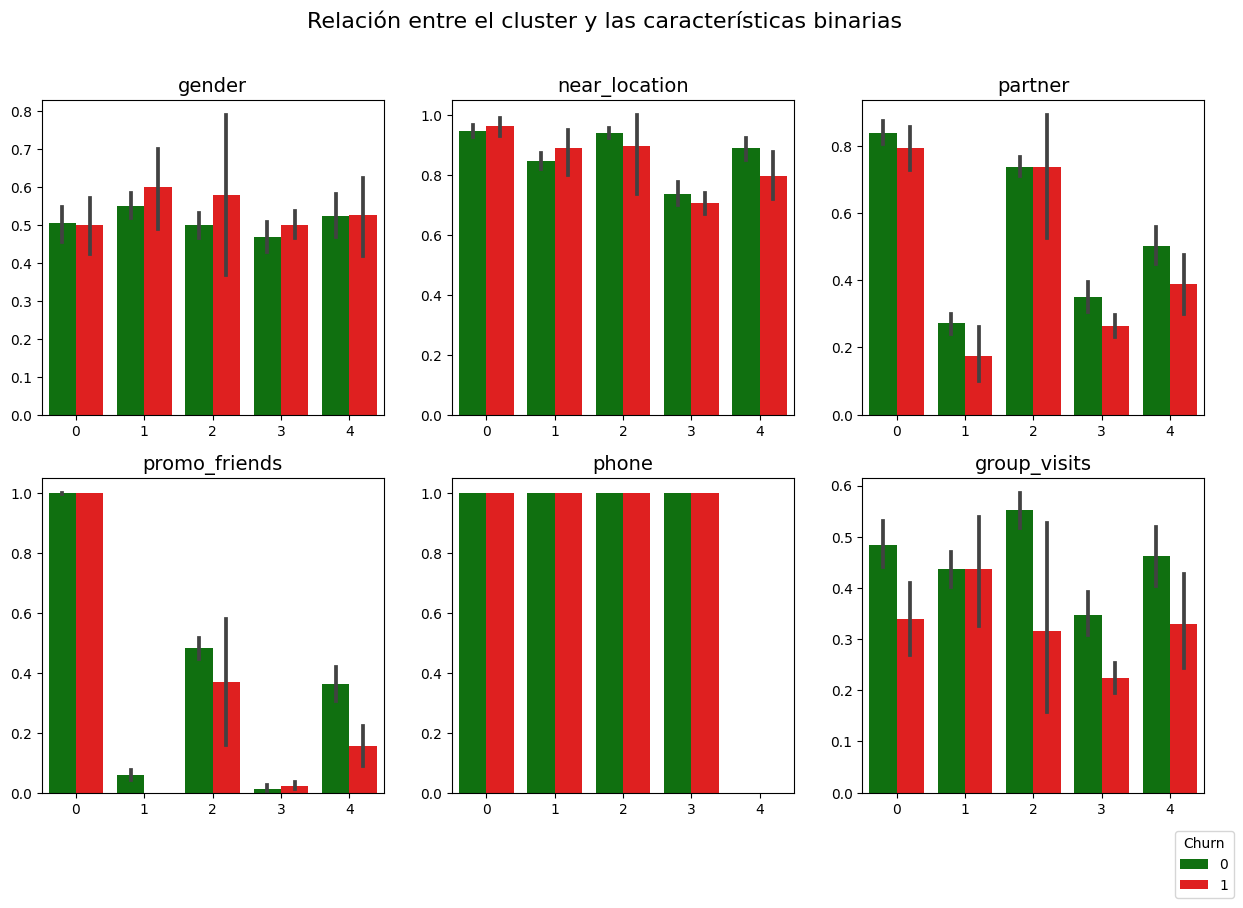

In [105]:
# Se seleccionan las características binarias de los clientes:
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

# Paleta personalizada: 0 = verde (no cancelado), 1 = rojo (cancelado)
palette = {0: "green", 1: "red"}

# Se distribuyen las gráficas de las características binarias:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,9))

# Bucle para generar cada gráfica:
for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.barplot(x='cluster', y=columns[i], data=df, hue='churn', palette=palette, ax=ax)
        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{columns[i]}', fontsize=14)
    else:
        ax.axis('off')

# Obtener los identificadores y etiquetas de la leyenda:
handles, labels = plt.gca().get_legend_handles_labels()

# Personalizar la leyenda con colores verde y rojo
plt.legend(handles, labels, title='Churn', loc='upper center', bbox_to_anchor=(1, -0.1))

fig.suptitle('Relación entre el cluster y las características binarias', fontsize=16)
fig.subplots_adjust(top=0.88)
plt.show()


Al analizar las características binarias de los 4 clústeres, no se identifican patrones claros que permitan predecir la cancelación de los clientes. Aunque algunas variables como partner, promo_friends y group_visits muestran diferencias entre clústeres, dentro de cada clúster los porcentajes de clientes que cancelan y los que permanecen son similares, por lo que estas características no permiten distinguir a quienes podrían cancelar.

**Gráficas de las variables continuas**

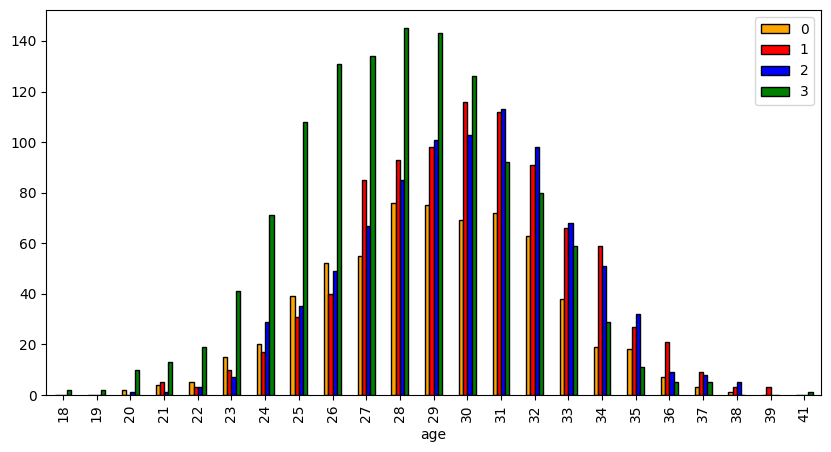

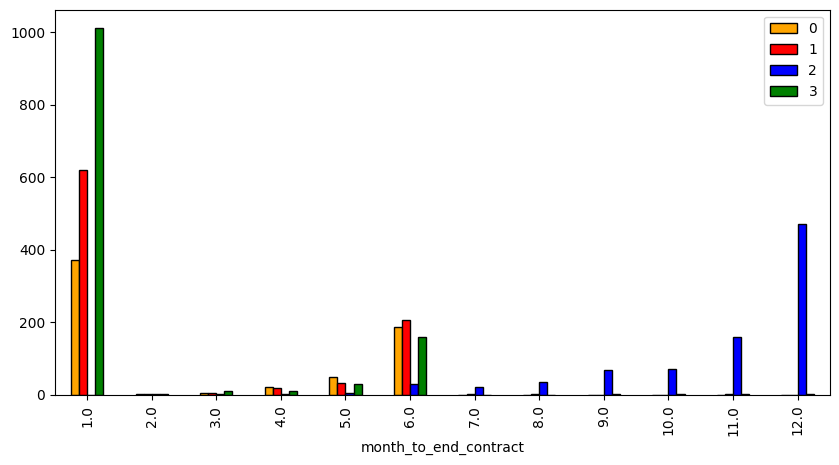

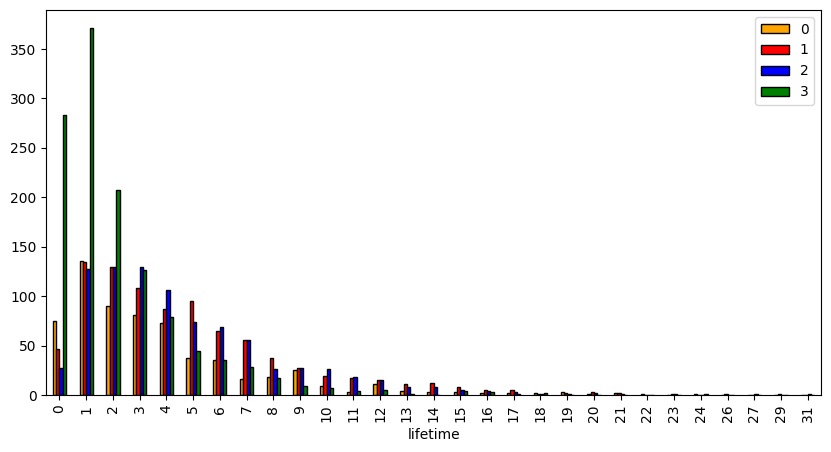

In [106]:
def graphic_per_feature(df, feature):
    handles_cluster = [0, 1, 2, 3]
    cluster0 = df[df['cluster'] == 0].groupby(feature)[feature].count()
    cluster1 = df[df['cluster'] == 1].groupby(feature)[feature].count()
    cluster2 = df[df['cluster'] == 2].groupby(feature)[feature].count()
    cluster3 = df[df['cluster'] == 3].groupby(feature)[feature].count()
    data = pd.concat([cluster0, cluster1, cluster2, cluster3], axis=1)
    data.columns = handles_cluster
    data.plot(kind = 'bar',
              edgecolor = 'black',
              figsize=[10,5],
              color=['orange', 'red', 'blue', 'green'])
    plt.show()
    return

# Se seleccionan las características continuas de los clientes:
columns = ['age', 'month_to_end_contract', 'lifetime']
for x in columns:
    graphic_per_feature(df = df, feature = x)

La distribución de la edad es similar entre los 4 clústeres, con ligeras diferencias en sus medias. Los clientes de los clústeres 0, 1 y 3 generalmente tienen menos de 1 mes restante de contrato, mientras que en el clúster 2 la mayoría tiene 6 meses o más. La mayoría de los clientes en todos los clústeres llevan menos de 8 meses desde su primera asistencia al gimnasio. Las características con valores decimales (avg_additional_charges_total, avg_class_frequency_total, avg_class_frequency_current_month) dificultan la visualización en gráficos de barras e histogramas, por lo que se categorizan para permitir representaciones más claras.

**Categorizar los valores de las características tipo float**

In [107]:
# Se define una función para categorizar los valores de las características tipo float:
def categorize_data(data, num_categories):
    min_val = np.min(data)
    max_val = np.max(data)
    category_width = (max_val - min_val) / num_categories
    categories = np.floor((data - min_val) / category_width).astype(int)
    categories = np.clip(categories, 0, num_categories - 1)  # Ensure categories are within bounds
    categories = round(min_val + category_width * (categories + .5), 2)
    return categories

# Se crea una copia de las características del tipo float y de los clústeres:
filtred_df = df[['cluster', 'avg_additional_charges_total', 'avg_class_frequency_total',
                 'avg_class_frequency_current_month']].copy()

# Se agregan las columnas de categorización de los valores de las 3 carataerísticas float:
filtred_df['avg_additional_charges_total_cat'] = categorize_data(filtred_df['avg_additional_charges_total'], 12)
filtred_df['avg_class_frequency_total_bins_cat'] = categorize_data(filtred_df['avg_class_frequency_total'], 12)
filtred_df['avg_class_frequency_current_month_cat'] = categorize_data(filtred_df['avg_class_frequency_current_month'], 12)

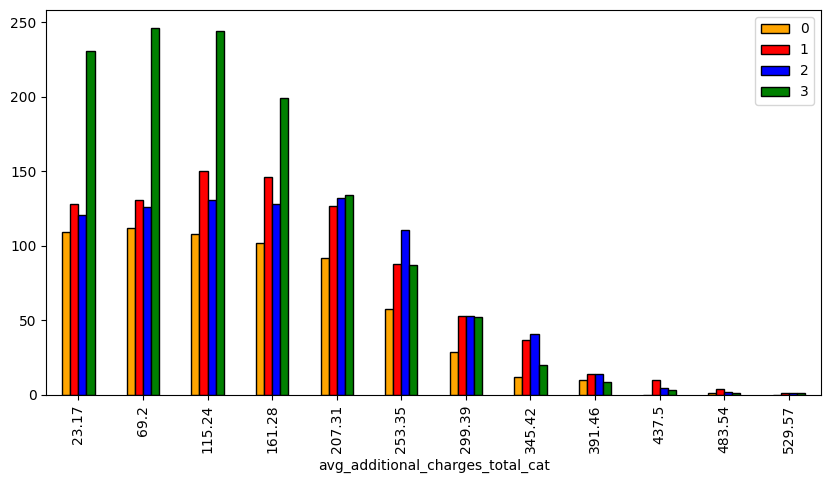

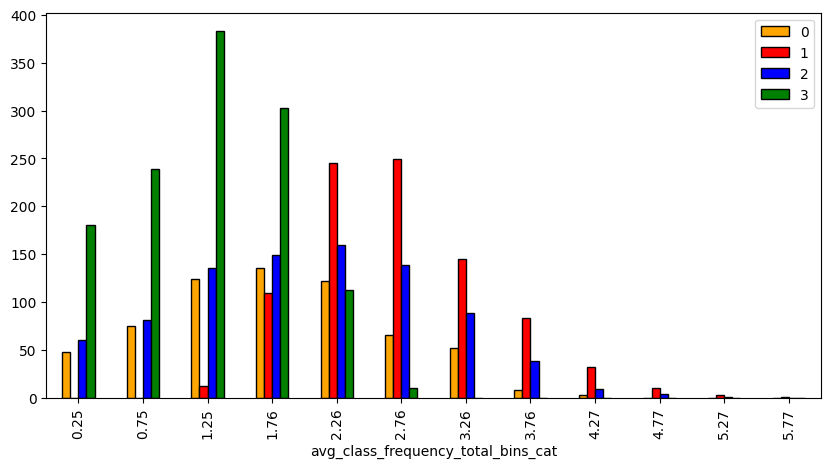

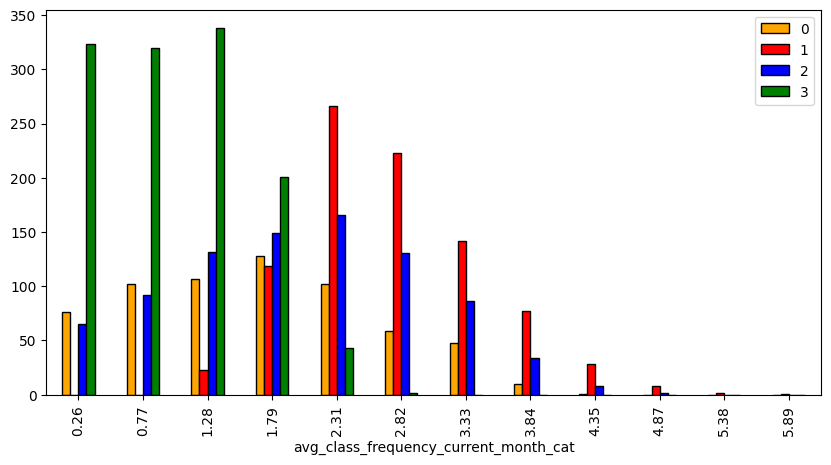

In [108]:
# Se seleccionan las características:
columns = ['avg_additional_charges_total_cat', 'avg_class_frequency_total_bins_cat', 'avg_class_frequency_current_month_cat']

# Se crea un bucle para realizar las gráficas para cada característica:
for x in columns:
    graphic_per_feature(df = filtred_df, feature = x)

No se observan diferencias claras en el gasto en otros servicios del último mes entre los clústeres. En cuanto a la frecuencia de asistencia semanal, los clientes del clúster 1 asisten menos, seguidos por los del clúster 0 y el clúster 2, mientras que los del clúster 3 muestran la mayor frecuencia de asistencia.

### 4.6 Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [109]:
# Calcular la tasa de cancelación por clúster
tasa_cancelacion = df.groupby('cluster')['churn'].mean().reset_index()
tasa_cancelacion.rename(columns={'churn': 'tasa_cancelacion'}, inplace=True)

print(tasa_cancelacion)


   cluster  tasa_cancelacion
0        0          0.246445
1        1          0.089989
2        2          0.021965
3        3          0.572942
4        4          0.266839


* Clúster 3 es el más riesgoso, con más de la mitad de sus clientes cancelando.
* Clúster 2 y 1 son los más leales, con tasas de cancelación muy bajas.
* Clúster 0 y 4 tienen tasas intermedias; podrían requerir atención para retener clientes.

## 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

* **Identificación de clientes en riesgo:** Aproximadamente una cuarta parte de los clientes cancelan su membresía cada mes, lo que indica la necesidad de una estrategia de retención.
* **Diferencias entre clientes que se quedan y clientes que se van:**
    * Los clientes que se quedan son más maduros, viven o trabajan cerca del gimnasio, asisten a clases grupales, tienen contratos más largos, visitan el gimnasio con mayor frecuencia y gastan más en servicios adicionales.
    * Los clientes que se van tienden a ser más jóvenes, tienen contratos de menor duración, asisten menos a clases y tienen una menor antigüedad en el gimnasio.
* **Segmentación de clientes por riesgo:**
    * El **Clúster 3** es el más riesgoso, ya que más de la mitad de sus clientes se dan de baja.
    * Los **Clústeres 1 y 2** son los más leales, con tasas de cancelación muy bajas.
    * Los **Clústeres 0 y 4** tienen tasas de abandono intermedias y podrían requerir atención para retener a los clientes.